# Wild Blueberry Yield Prediction

## Data Description

The dataset is about the Wild Blueberries and the parameters that are helpful to grow the blueberries. The features table is given below.



| Features              | Unit          | Description                                                        |
| --------------------- | ------------- | ------------------------------------------------------------------ |
| Clonesize             | m2            | The average blueberry clone size in the field                      |
| Honeybee              | bees/m2/min   | Honeybee density in the field                                      |
| Bumbles               | bees/m2/min   | Bumblebee density in the field                                     |
| Andrena               | bees/m2/min   | Andrena bee density in the field                                   |
| Osmia                 | bees/m2/min   | Osmia bee density in the field                                     |
| MaxOfUpperTRange      | ℃             | The highest record of the upper band daily air temperature during the bloom season |
| MinOfUpperTRange      | ℃             | The lowest record of the upper band daily air temperature          |
| AverageOfUpperTRange  | ℃             | The average of the upper band daily air temperature                |
| MaxOfLowerTRange      | ℃             | The highest record of the lower band daily air temperature         |
| MinOfLowerTRange      | ℃             | The lowest record of the lower band daily air temperature          |
| AverageOfLowerTRange  | ℃             | The average of the lower band daily air temperature                |
| RainingDays           | Day           | The total number of days during the bloom season, each of which has precipitation larger than zero |
| AverageRainingDays    | Day           | The average of raining days of the entire bloom season             |


## Problem Statement

The project is based on how accurately we can predict the yield of the wild blueberries with the given features like type and availability of honey bees, tempreature range and rainy days.

## Data & Package Importing

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
import seaborn as sns
import pandas as pd
import warnings

from sklearn.metrics import (accuracy_score,
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix, mean_squared_error, mean_absolute_error)
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor

In [3]:
original_set= pd.read_csv("/content/WildBlueberryPollinationSimulationData.csv")

In [4]:
X = original_set.iloc[:, :-1]
y = original_set.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [5]:
train_set = pd.concat([X_train, y_train], axis=1)

In [6]:
test_set=pd.concat([X_test, y_test], axis=1)

## Data Cleaning and Preparation

In [7]:
train_set.shape

(738, 18)

In [8]:
test_set.shape

(39, 18)

In [9]:
original_set.shape

(777, 18)

In [10]:
# Firstly understanding the data distribution

train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Row#,738.0,385.295393,223.590443,0.000000,193.250000,383.500000,575.750000,776.000000
clonesize,738.0,18.689024,7.013302,10.000000,12.500000,12.500000,25.000000,40.000000
honeybee,738.0,0.419478,1.003913,0.000000,0.250000,0.250000,0.500000,18.430000
bumbles,738.0,0.281889,0.065525,0.000000,0.250000,0.250000,0.380000,0.380000
andrena,738.0,0.468512,0.160140,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,738.0,0.563501,0.167701,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,738.0,82.219241,9.211628,69.700000,77.400000,86.000000,88.250000,94.600000
MinOfUpperTRange,738.0,49.683469,5.595831,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,738.0,68.685230,7.693722,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,738.0,59.265312,6.658803,50.200000,55.800000,62.000000,65.000000,68.200000


In [11]:
test_set.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,439.179487,20.256410,0.372744,0.291846,0.474590,0.534821,83.371795,50.023077,69.438462,60.143590,29.002564,49.089744,14.962564,0.274872,0.506495,0.451376,36.656245,6108.719027
std,237.266547,6.634114,0.140000,0.080708,0.179627,0.194468,8.892159,5.657806,7.412423,6.461701,3.093413,5.247546,13.158119,0.185485,0.076636,0.039663,4.447788,1340.474998
min,14.000000,12.500000,0.000000,0.117000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.315500,0.367763,27.401755,3049.260316
25%,234.500000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,1.000000,0.100000,0.448478,0.422064,33.640528,4903.967137
50%,490.000000,25.000000,0.500000,0.250000,0.409000,0.500000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.526987,0.456067,36.880849,6569.249674
75%,636.000000,25.000000,0.500000,0.380000,0.630000,0.690000,91.800000,54.600000,75.450000,67.100000,31.500000,53.350000,24.000000,0.390000,0.553746,0.473897,38.906631,6933.973496
max,775.000000,37.500000,0.537000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.642882,0.532772,46.585105,8605.199951


By observing the standard deviation, mean, min and max the data destribution of train and test data is almost same

In [12]:
train_set.isna().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

There is no missing values in the dataset

In [13]:
test_set.isna().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

There are no missing values in the test dataset as well.

In [14]:
# checking missing values
train_set.duplicated().sum()

0

There are no duplicate values present in the dataset

In [15]:
# Checking data type

train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 40 to 684
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  738 non-null    int64  
 1   clonesize             738 non-null    float64
 2   honeybee              738 non-null    float64
 3   bumbles               738 non-null    float64
 4   andrena               738 non-null    float64
 5   osmia                 738 non-null    float64
 6   MaxOfUpperTRange      738 non-null    float64
 7   MinOfUpperTRange      738 non-null    float64
 8   AverageOfUpperTRange  738 non-null    float64
 9   MaxOfLowerTRange      738 non-null    float64
 10  MinOfLowerTRange      738 non-null    float64
 11  AverageOfLowerTRange  738 non-null    float64
 12  RainingDays           738 non-null    float64
 13  AverageRainingDays    738 non-null    float64
 14  fruitset              738 non-null    float64
 15  fruitmass             

In [16]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 150 to 222
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  39 non-null     int64  
 1   clonesize             39 non-null     float64
 2   honeybee              39 non-null     float64
 3   bumbles               39 non-null     float64
 4   andrena               39 non-null     float64
 5   osmia                 39 non-null     float64
 6   MaxOfUpperTRange      39 non-null     float64
 7   MinOfUpperTRange      39 non-null     float64
 8   AverageOfUpperTRange  39 non-null     float64
 9   MaxOfLowerTRange      39 non-null     float64
 10  MinOfLowerTRange      39 non-null     float64
 11  AverageOfLowerTRange  39 non-null     float64
 12  RainingDays           39 non-null     float64
 13  AverageRainingDays    39 non-null     float64
 14  fruitset              39 non-null     float64
 15  fruitmass             

In [17]:
# Checking the unique values in the dataset

train_set.nunique()

Row#                    738
clonesize                 6
honeybee                  7
bumbles                   9
andrena                  12
osmia                    12
MaxOfUpperTRange          5
MinOfUpperTRange          5
AverageOfUpperTRange      5
MaxOfLowerTRange          5
MinOfLowerTRange          5
AverageOfLowerTRange      5
RainingDays               5
AverageRainingDays        5
fruitset                738
fruitmass               738
seeds                   738
yield                   738
dtype: int64

In [18]:
# Exploring the data

train_set.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
40,40,25.0,0.25,0.25,0.25,0.38,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.443420,0.426240,33.441606,4870.625368
493,493,25.0,0.50,0.25,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.467157,0.435851,34.485510,5424.123512
489,489,25.0,0.50,0.25,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.506260,0.453120,36.547850,6117.475900
593,593,25.0,0.50,0.25,0.63,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.506794,0.452310,36.436436,6493.637124
425,425,12.5,0.25,0.38,0.50,0.63,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.509934,0.453341,36.661684,5898.015732


Here all the features are numerical in nature

## Exploratory Data Analysis

### Train test overlapping and distribution

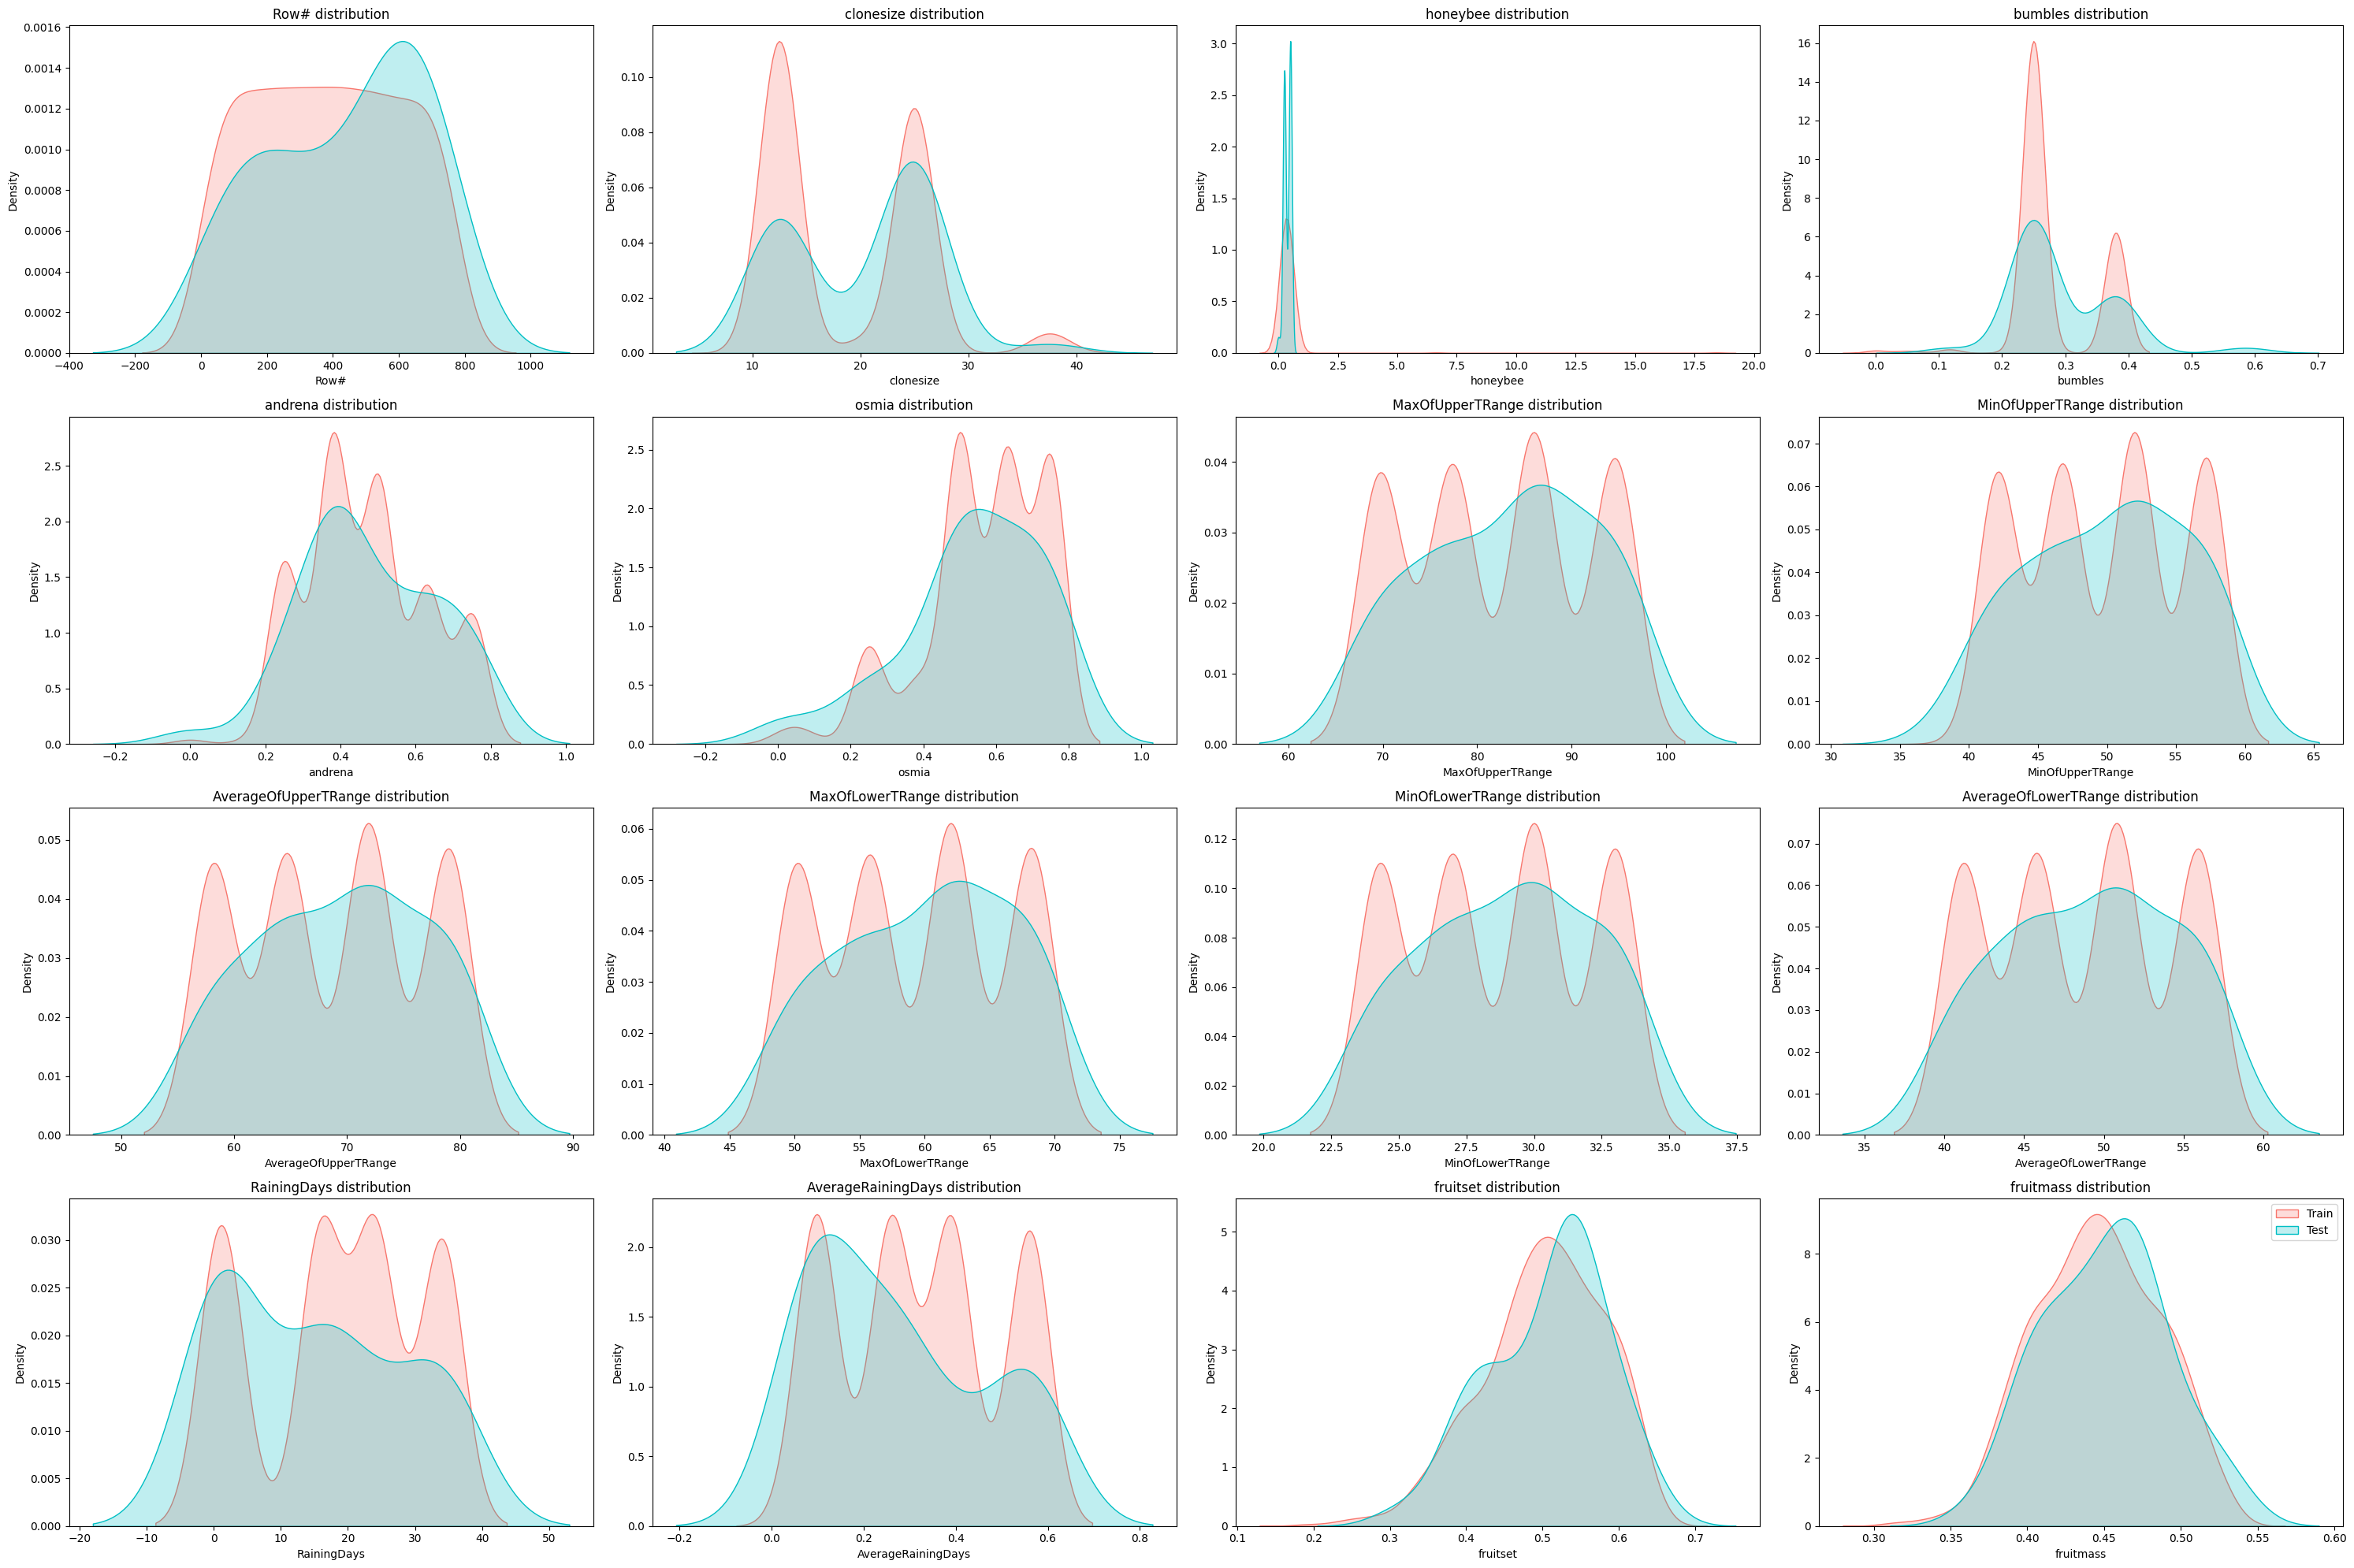

In [19]:
cont_col = [i for (i, j) in zip(test_set.columns, test_set.dtypes) if j in ["int", "float"]]
fig, axes = plt.subplots(4, 4, figsize=(30, 20))
for i, ax in enumerate(axes.flat):
    sns.kdeplot(ax=ax, data=train_set, x=cont_col[i], color="#F8766D", label="Train", fill=True)
    sns.kdeplot(ax=ax, data=test_set, x=cont_col[i], color="#00BFC4", label="Test", fill=True)
    ax.set_title(f"{cont_col[i]} distribution")
fig.tight_layout()
plt.legend()

<Axes: xlabel='yield', ylabel='Density'>

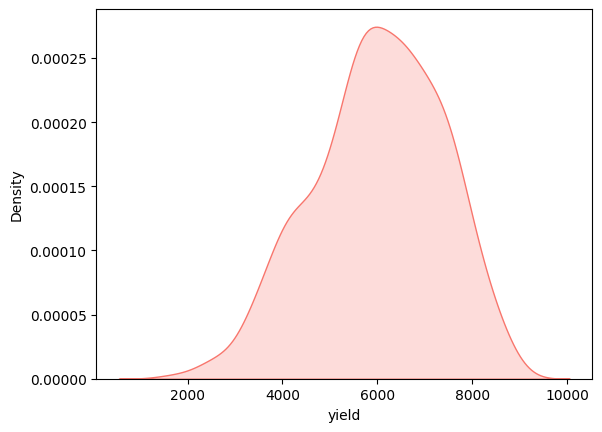

In [20]:
# Plotting the dependent variable

sns.kdeplot( train_set['yield'], color="#F8766D", fill=True)

The yield is also showing almost normal distribution

### Visualisation

In [23]:
def add_spines(colour = '#425169', linewidth = 2):
    """
    Add beautiful spines to you plots
    """
    ax = plt.gca()
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines[['bottom', 'left', 'top', 'right']].set_color(colour)
    ax.spines[['bottom', 'left', 'top', 'right']].set_linewidth(linewidth)

In [24]:
def rem_out(df, columns):
    """
    funtion to remove outliers
    defined to remove skewness from our plots
    """
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
        return df

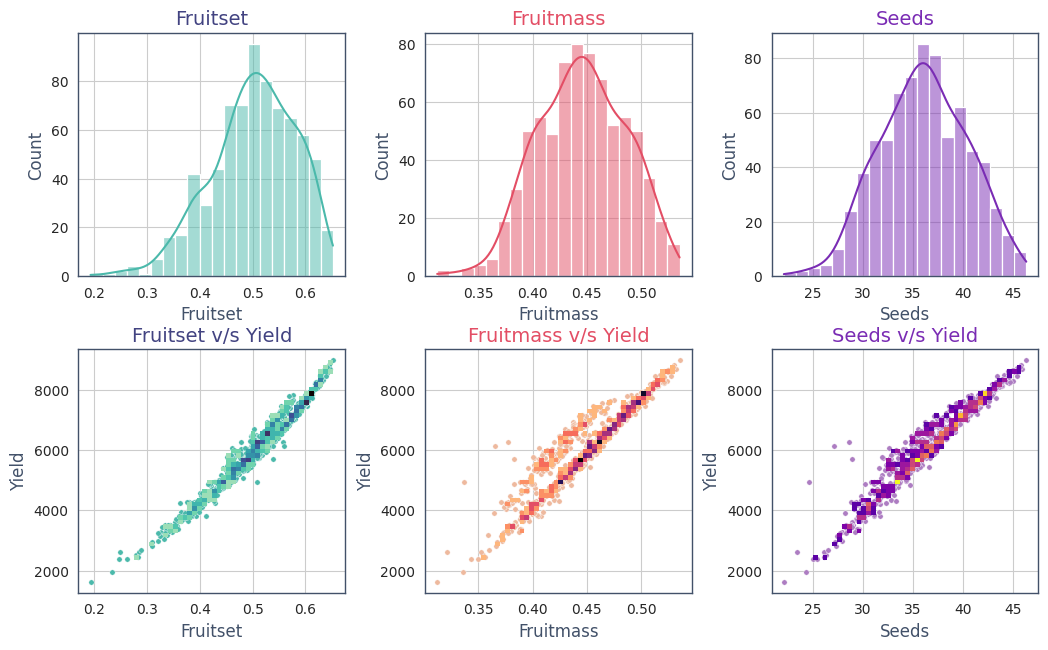

In [25]:
df1 = rem_out(train_set, ['honeybee'])
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))

plt.subplot(2, 3 ,4)
# sns.kdeplot(x='fruitset', y='seeds', data=df, levels=5, color="#356c9c", linewidths=1)
sns.scatterplot(x='fruitset', y='yield', data=train_set, s=15, color="#4bb9ab")
sns.histplot(x='fruitset', y='yield', data=train_set, bins=50, pthresh=.05, cmap='mako_r')
plt.title('Fruitset v/s Yield', fontsize=14).set_color('#424381')
plt.xlabel('Fruitset', fontsize= 12).set_color('#425169')
plt.ylabel('Yield', fontsize= 12).set_color('#425169')
add_spines(linewidth=1)

plt.subplot(2, 3 ,5)
# sns.kdeplot(x='fruitset', y='seeds', data=df, levels=5, color="#356c9c", linewidths=1)
sns.scatterplot(x='fruitmass', y='yield', data=train_set, s=15, color="#eeb99e")
sns.histplot(x='fruitmass', y='yield', data=train_set, bins=50, pthresh=.05, cmap='magma_r')
plt.title('Fruitmass v/s Yield', fontsize=14).set_color('#e34e65')
plt.xlabel('Fruitmass', fontsize= 12).set_color('#425169')
plt.ylabel('Yield', fontsize= 12).set_color('#425169')
add_spines(linewidth=1)

plt.subplot(2, 3 ,6)
# sns.kdeplot(x='fruitset', y='seeds', data=df, levels=5, color="#356c9c", linewidths=1)
sns.scatterplot(x='seeds', y='yield', data=train_set, s=15, color="#ad7dc2")
sns.histplot(x='seeds', y='yield', data=train_set, bins=50, pthresh=.05, cmap='plasma')
plt.title('Seeds v/s Yield', fontsize=14).set_color('#7a2cb4')
plt.xlabel('Seeds', fontsize= 12).set_color('#425169')
plt.ylabel('Yield', fontsize= 12).set_color('#425169')
add_spines(linewidth=1)

plt.subplot(2, 3 ,1)
sns.histplot(train_set['fruitset'], bins=20, kde=True, color='#4bb9ab')
plt.xlabel('Fruitset', fontsize= 12).set_color('#425169')
plt.ylabel('Count', fontsize= 12).set_color('#425169')
plt.title('Fruitset', fontsize=14).set_color('#424381')
add_spines(linewidth=1)

plt.subplot(2, 3 ,2)
sns.histplot(train_set['fruitmass'], bins=20, kde=True, color='#e34e65')
plt.xlabel('Fruitmass', fontsize= 12).set_color('#425169')
plt.ylabel('Count', fontsize= 12).set_color('#425169')
add_spines(linewidth=1)
plt.title('Fruitmass', fontsize=14).set_color('#e34e65')


plt.subplot(2, 3 ,3)
sns.histplot(train_set['seeds'], bins=20, kde=True, color='#7a2cb4')
plt.xlabel('Seeds', fontsize= 12).set_color('#425169')
plt.ylabel('Count', fontsize= 12).set_color('#425169')
add_spines(linewidth=1)
plt.title('Seeds', fontsize=14).set_color('#7a2cb4')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)


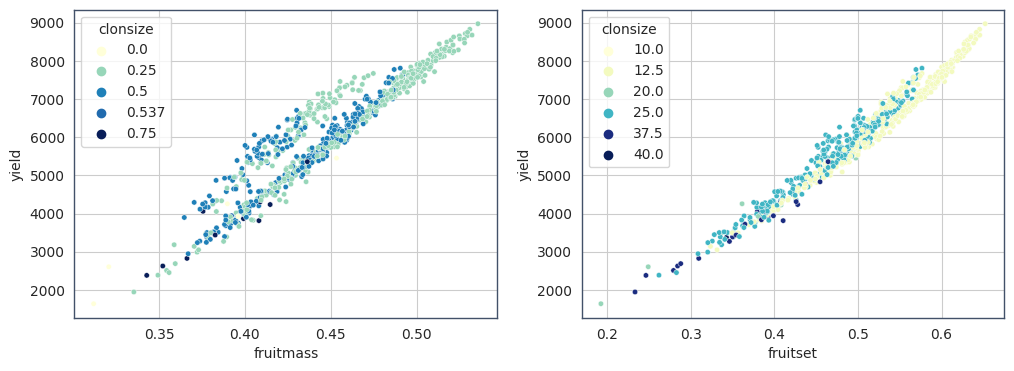

In [26]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2 ,1)
sns.scatterplot(x='fruitmass', y='yield', data=df1, s=15, hue='honeybee', palette='YlGnBu')
plt.legend(title='clonsize', loc='upper left')
add_spines(linewidth=1)

plt.subplot(1, 2 ,2)
sns.scatterplot(x='fruitset', y='yield', data=df1, s=15, hue='clonesize', palette='YlGnBu')
plt.legend(title='clonsize', loc='upper left')
add_spines(linewidth=1)

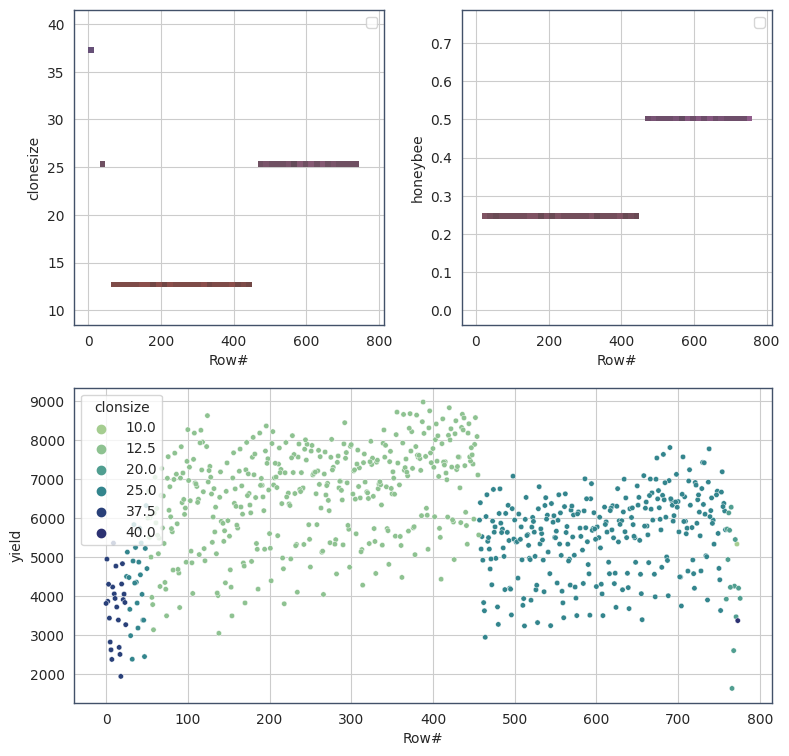

In [27]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(hspace=0.8)
grid = plt.GridSpec(2, 2, hspace=0.2, wspace=0.25)

plt.subplot(grid[0, 0])
sns.histplot(x='Row#', y='clonesize', data=train_set , bins=50, pthresh=.05, cmap='magma_r', hue='clonesize')
plt.legend()
add_spines(linewidth=1)
plt.subplot(grid[0, 1])
sns.histplot(x='Row#', y='honeybee', data=df1, bins=50, pthresh=.05, cmap='mako', hue = 'honeybee')
plt.legend()
add_spines(linewidth=1)

plt.subplot(grid[1, :])
sns.scatterplot(x='Row#', y='yield', data=train_set, s=15, hue='clonesize', palette='crest')
plt.legend(title='clonsize', loc='upper left')
add_spines(linewidth=1)

<ipython-input-28-c8059e3717be>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['beesum'] = df1['osmia'] +  df1['andrena'] +df1['bumbles'] + df1['honeybee']


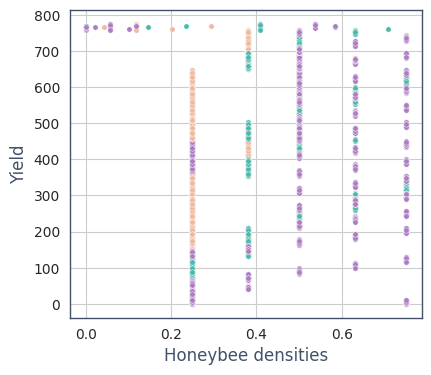

In [28]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x='honeybee', y='Row#', data=df1, s=15, color="#ad7dc2")
sns.scatterplot(x='bumbles', y='Row#', data=df1, s=15, color="#eeb99e")
sns.scatterplot(x='andrena', y='Row#', data=df1, s=15, color="#4bb9ab")
sns.scatterplot(x='osmia', y='Row#', data=df1, s=15, color="#ad7dc2")
df1['beesum'] = df1['osmia'] +  df1['andrena'] +df1['bumbles'] + df1['honeybee']
plt.xlabel('Honeybee densities', fontsize= 12).set_color('#425169')
plt.ylabel('Yield', fontsize= 12).set_color('#425169')
add_spines(linewidth=1)


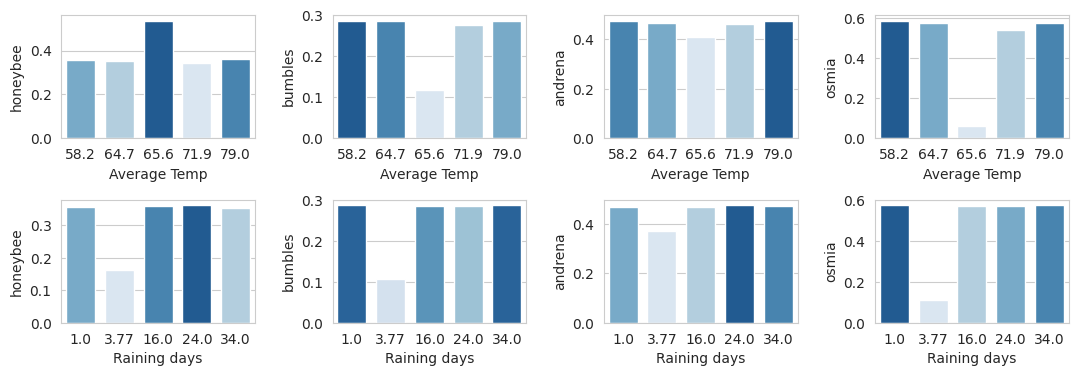

In [29]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(13, 4))
fig.subplots_adjust(wspace=0.4, hspace = 0.5)

bees = ['honeybee', 'bumbles', 'andrena', 'osmia']
temp_bee = df1.groupby(['AverageOfUpperTRange'])[bees].mean().reset_index()
rain_bee = df1.groupby(['RainingDays'])[bees].mean().reset_index()

for i, col in enumerate(bees):
    plt.subplot(2, 4 ,i+1)
    sns.barplot(temp_bee, x='AverageOfUpperTRange', y = col, palette = 'Blues', hue=col, dodge=False, width=0.75)
    plt.legend().set_visible(False)
    plt.xlabel('Average Temp')

for i, col in enumerate(bees):
    plt.subplot(2, 4 ,i+5)
    sns.barplot(rain_bee, x='RainingDays', y = col, palette = 'Blues', hue=col, dodge=False, width=0.75)
    plt.legend().set_visible(False)
    plt.xlabel('Raining days')

### Feature Engineering

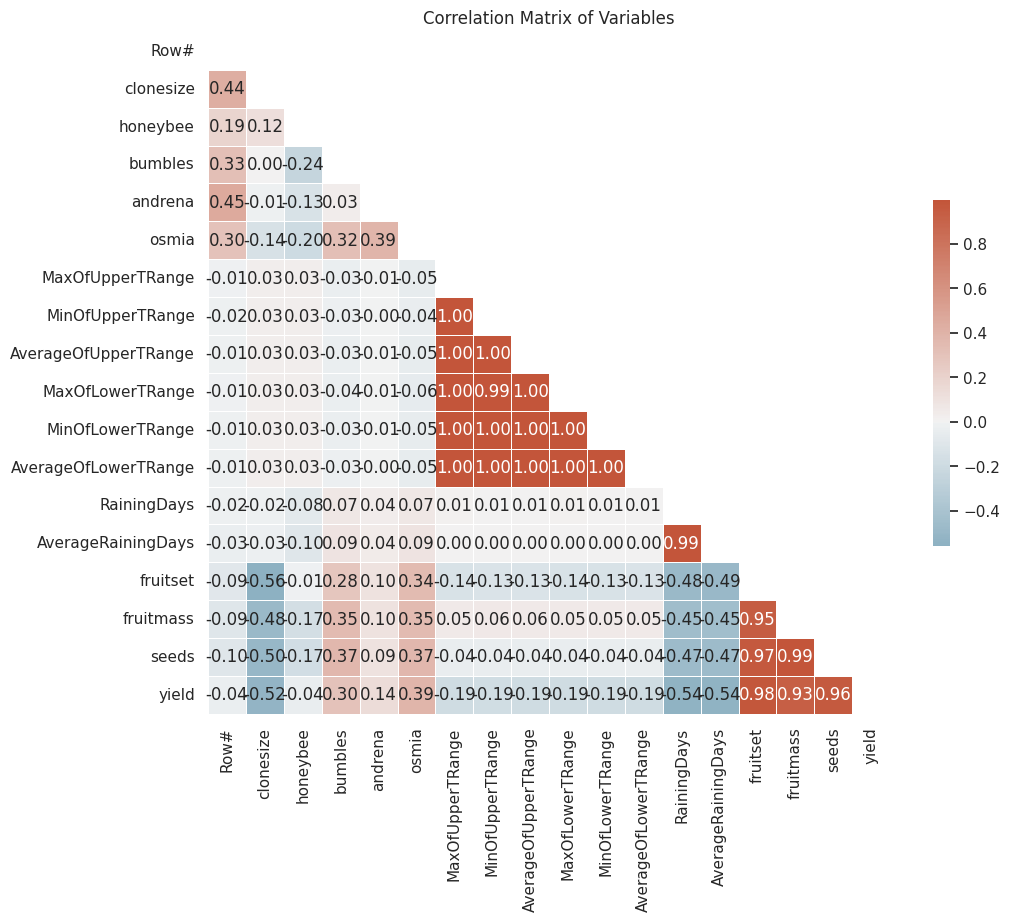

In [30]:
# Compute the correlation matrix
corr_matrix = train_set.corr()

# Set the overall aesthetics for the plot
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title for the correlation matrix
plt.title("Correlation Matrix of Variables")

# Show the plot
plt.show()

In [31]:
# Set the correlation threshold
threshold = 0.8

# Create a list to store the variables to remove
variables_to_remove = []

# Iterate through the correlation matrix, ignoring the target variable's row and column
for i in range(len(corr_matrix.columns)):
    if corr_matrix.columns[i] == "yield":
        continue

    for j in range(i):
        if corr_matrix.columns[j] == "yield":
            continue

        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            variables_to_remove.append(colname)

# Remove duplicate variables from the list
variables_to_remove = list(set(variables_to_remove))

# Print the variables to remove
print("Variables to remove:", variables_to_remove)

Variables to remove: ['AverageOfUpperTRange', 'MinOfUpperTRange', 'AverageOfLowerTRange', 'AverageRainingDays', 'seeds', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'fruitmass']


From the above correlation matrix, it can be said the features like 'MinOfLowerTRange', 'MinOfUpperTRange', 'AverageOfLowerTRange', 'seeds', 'AverageOfUpperTRange', 'fruitmass', 'AverageRainingDays', 'MaxOfLowerTRange' are highly correlated with other independent variables so therefore we need to remove them further.


In [32]:
# Drop the variables from the dataset
train_set = train_set.drop(columns=variables_to_remove)
test_set = test_set.drop(columns=variables_to_remove)

In [33]:
train_set.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,yield
40,40,25.0,0.25,0.25,0.25,0.38,86.0,16.0,0.443420,4870.625368
493,493,25.0,0.50,0.25,0.38,0.75,86.0,24.0,0.467157,5424.123512
489,489,25.0,0.50,0.25,0.38,0.75,86.0,16.0,0.506260,6117.475900
593,593,25.0,0.50,0.25,0.63,0.75,77.4,16.0,0.506794,6493.637124
425,425,12.5,0.25,0.38,0.50,0.63,94.6,24.0,0.509934,5898.015732


In [34]:
test_set.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,yield
150,150,12.5,0.25,0.25,0.38,0.38,94.6,1.0,0.556295,6795.881873
122,122,12.5,0.25,0.25,0.25,0.75,94.6,34.0,0.411591,4357.822918
546,546,25.0,0.50,0.25,0.50,0.75,77.4,1.0,0.539904,7293.536170
14,14,37.5,0.25,0.25,0.25,0.25,94.6,1.0,0.381314,3900.344042
542,542,25.0,0.50,0.25,0.50,0.75,86.0,34.0,0.402948,4387.741853


In [35]:
train_set.to_csv('train_set.csv')

In [36]:
test_set.to_csv('test_set.csv')

### Checking Outliers

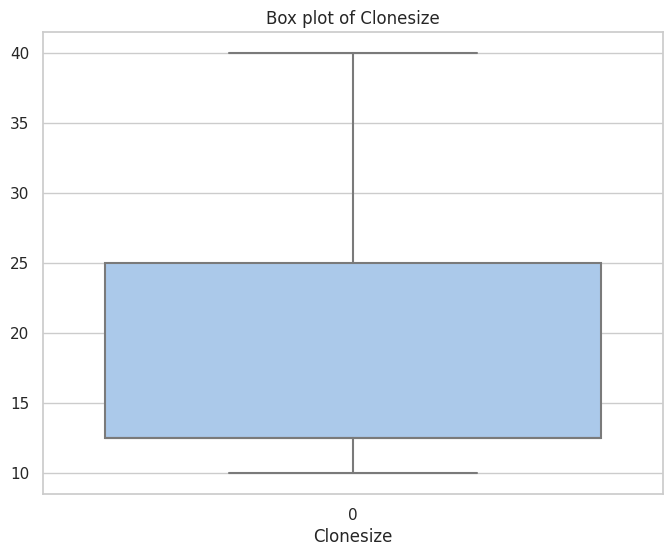

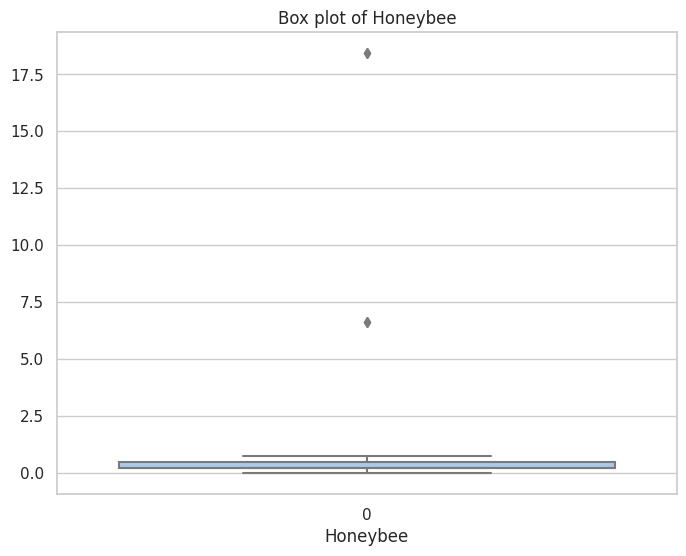

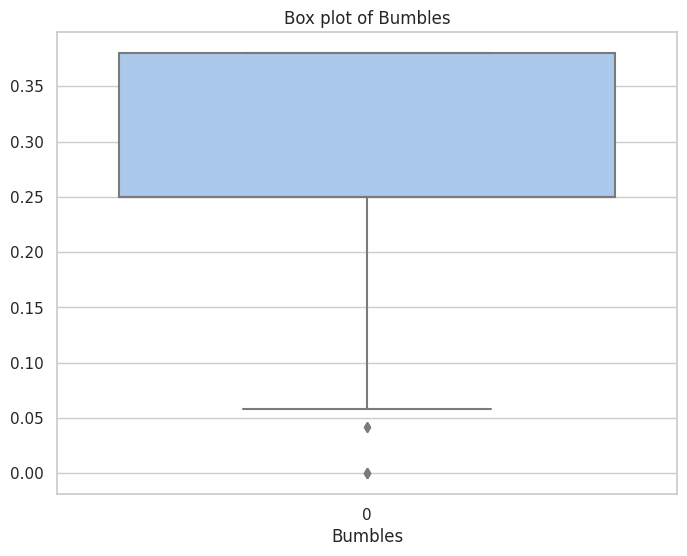

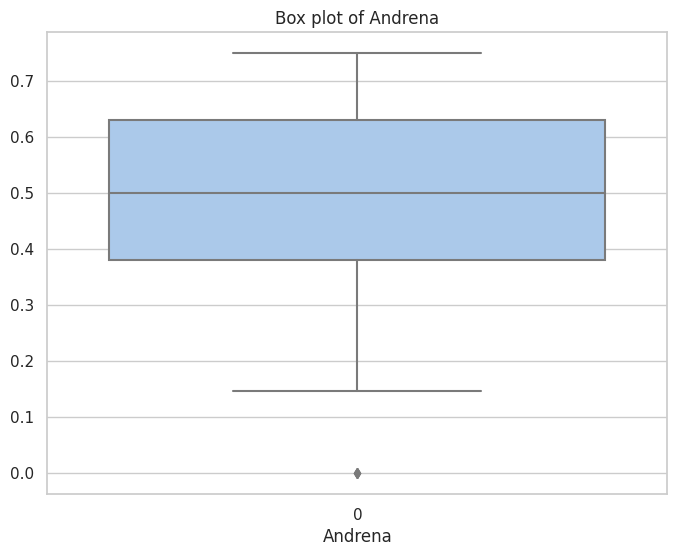

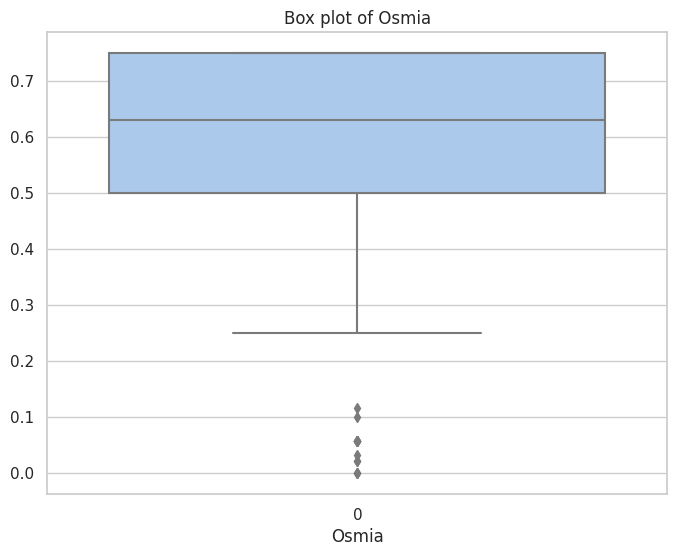

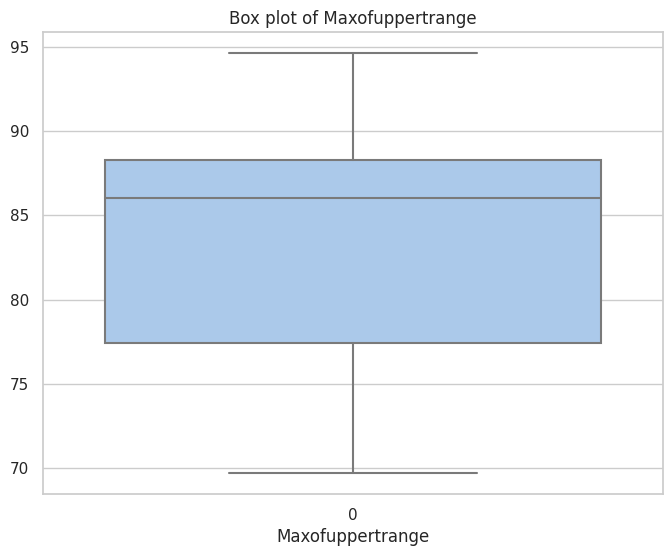

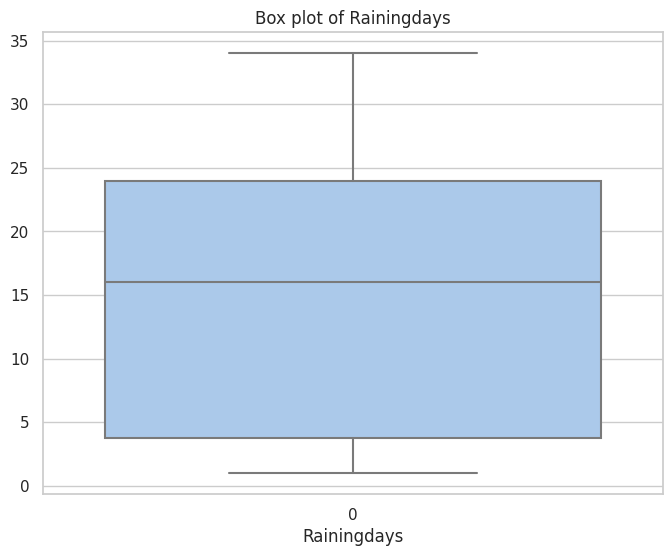

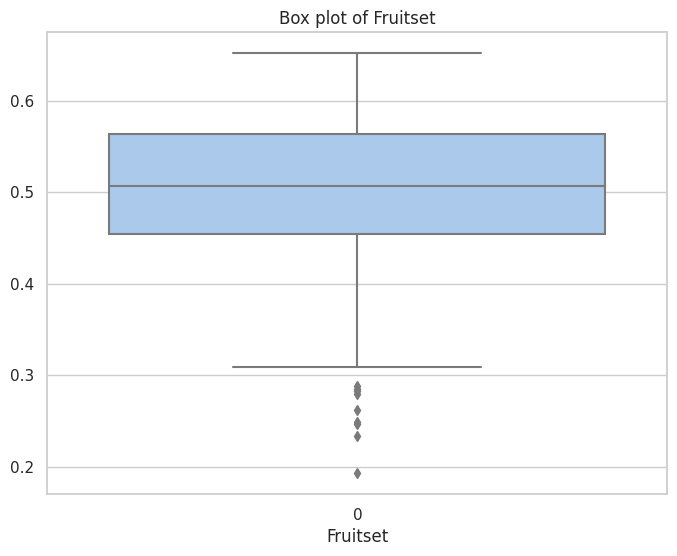

In [37]:
# New features list
new_features = ["clonesize", "honeybee", "bumbles", "andrena", "osmia", "MaxOfUpperTRange", "RainingDays",
            "fruitset"]
# Set the overall aesthetics for the plots
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Loop through the features and create box plots
for feature in new_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train_set[feature])
    plt.title(f"Box plot of {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.show()


From above box-plots, we can see that most of the features does not contain any outlier, though their are some features which have some outliers but it would have insignificant impact on the box-plot

### K-means clustering

In [38]:
# Remove the target variable as it's not relevant for clustering
data_no_target = train_set.drop(columns=["yield"])

# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_no_target)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

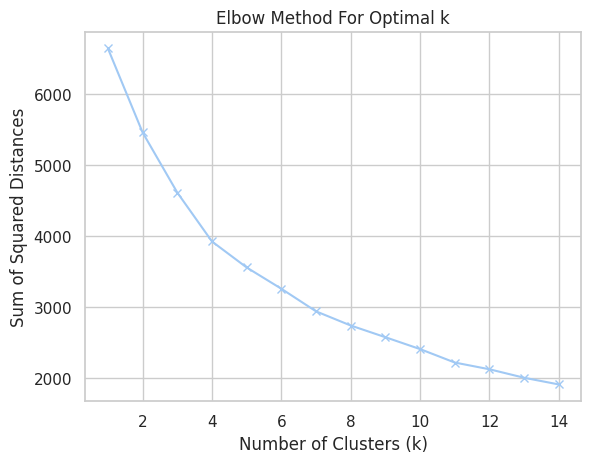

In [39]:
# Calculate the sum of squared distances for different numbers of clusters
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


From the plotting we can say the it can have 5 clusters in the dataset

In [40]:
# Set the optimal number of clusters
optimal_k = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(data_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Principle Component Analysis

In [41]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)


In [42]:
principal_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
principal_df["Cluster"] = cluster_labels

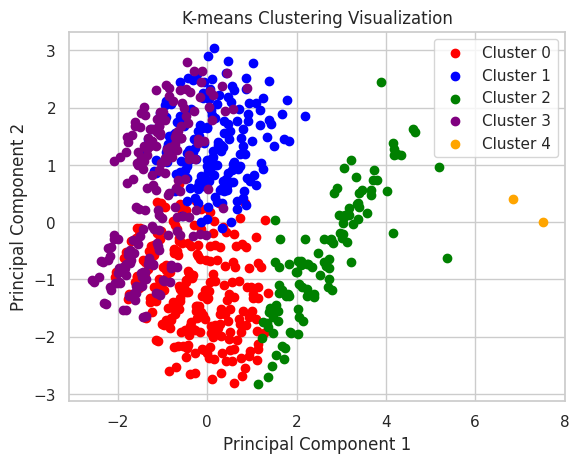

In [43]:
# Set the colors for the clusters
colors = ["red", "blue", "green", "purple", "orange", "cyan", "magenta", "yellow", "black", "gray"]

# Plot the clusters
for cluster in range(optimal_k):
    plt.scatter(principal_df.loc[principal_df["Cluster"] == cluster, "PC1"],
                principal_df.loc[principal_df["Cluster"] == cluster, "PC2"],
                c=colors[cluster], label=f"Cluster {cluster}")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering Visualization")
plt.legend()
plt.show()


From the above scatter plot, the clusters are not sperated clearly, however to make sure we need to calculate the silhoutte score, calinski score and davies score which will tells us about the quality of the clusters formed.

### Conclusion EDA

From the above EDA process, we have removed the features which are highly correlated with each other. Moreover, there are some features which have outliers but it would have insignificant impact on the model. On top of that, we performed K-means clustering but didn't got good quality clusters therefore we can conclude that we don't have similar and distinct groups in the dataset.

# CATBOOST MODEL

In [44]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.8 MB/s eta 0:00:00


In [45]:
! pip install xgboost

In [46]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
from sklearn.model_selection import train_test_split


In [47]:
# Importing the train and test data
original_set= pd.read_csv("/content/WildBlueberryPollinationSimulationData.csv")
X = original_set.iloc[:, :-1]
y = original_set.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)
train_set =pd.read_csv("/content/train_set.csv")
test_set= pd.read_csv("/content/test_set.csv")
X_train.shape, X_test.shape

((738, 17), (39, 17))

In [48]:
train_set.head()

,Unnamed: 0,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,yield
0,40,40,25.0,0.25,0.25,0.25,0.38,86.0,16.0,0.443420,4870.625368
1,493,493,25.0,0.50,0.25,0.38,0.75,86.0,24.0,0.467157,5424.123512
2,489,489,25.0,0.50,0.25,0.38,0.75,86.0,16.0,0.506260,6117.475900
3,593,593,25.0,0.50,0.25,0.63,0.75,77.4,16.0,0.506794,6493.637124
4,425,425,12.5,0.25,0.38,0.50,0.63,94.6,24.0,0.509934,5898.015732


In [49]:
test_set.head()

,Unnamed: 0,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,yield
0,150,150,12.5,0.25,0.25,0.38,0.38,94.6,1.0,0.556295,6795.881873
1,122,122,12.5,0.25,0.25,0.25,0.75,94.6,34.0,0.411591,4357.822918
2,546,546,25.0,0.50,0.25,0.50,0.75,77.4,1.0,0.539904,7293.536170
3,14,14,37.5,0.25,0.25,0.25,0.25,94.6,1.0,0.381314,3900.344042
4,542,542,25.0,0.50,0.25,0.50,0.75,86.0,34.0,0.402948,4387.741853


## MODEL EVALUATION

Function to return the accuracy measures of the models.

In [50]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

Function to apply a set of Machine Learning Models to the dataset to find the mest model for predicting the unseen data.

In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 120.1661
- Mean Absolute Error: 91.7736
- R2 Score: 0.9922
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 165.7291
- Mean Absolute Error: 110.7219
- R2 Score: 0.9843


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 366.2532
- Mean Absolute Error: 286.7362
- R2 Score: 0.9272
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 545.1315
- Mean Absolute Error: 348.5277
- R2 Score: 0.8303


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 194.4676
- Mean Absolute Error: 150.8551
- R2 Score: 0.9784


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 57.9326
- Mean Absolute Error: 42.

In [52]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
5,CatBoosting Regressor,0.990905
3,Random Forest Regressor,0.987248
4,XGBRegressor,0.987052
0,Linear Regression,0.984312
2,Decision Tree,0.978400
6,AdaBoost Regressor,0.974835
1,K-Neighbors Regressor,0.830267


After applying all the regressor models, the best model we got is CatBoosting
Regressor. Therefore, we will have the final prediction on test data by the Catboosting model.

## CATBOOST REGRESSION

In [53]:
# Importing the train and test data
original_set= pd.read_csv("/content/WildBlueberryPollinationSimulationData.csv")

train_set =pd.read_csv("/content/train_set.csv")
test_set= pd.read_csv("/content/test_set.csv")
X_train= train_set.iloc[:, :-1]

y_train= train_set.iloc[:, -1]
X_test=test_set.iloc[:, :-1]
y_test= test_set.iloc[:, -1]
print(X_train.columns)
X_train.shape

Index(['Unnamed: 0', 'Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena',
       'osmia', 'MaxOfUpperTRange', 'RainingDays', 'fruitset'],
      dtype='object')


(738, 10)

In [54]:
# Create and train the CatBoostRegressor model
model = CatBoostRegressor(verbose=False)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)



In [55]:
import pandas as pd

# Define the columns you want in the new DataFrame
columns = ['Unnamed: 0', 'Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena',
           'osmia', 'MaxOfUpperTRange', 'RainingDays', 'fruitset']

# Define the manual values as a list of lists
manual_values = [
    [0, 40, 25.0, 0.25, 0.25, 0.25, 0.38, 86.0, 16.0, 0.443420],
    # Add more rows with values as needed
]

# Create a new DataFrame
new_dataframe = pd.DataFrame(manual_values, columns=columns)

# Display the new DataFrame
print(new_dataframe)
print(model.predict(new_dataframe))

   Unnamed: 0  Row#  clonesize  honeybee  bumbles  andrena  osmia  \
0           0    40       25.0      0.25     0.25     0.25   0.38   

   MaxOfUpperTRange  RainingDays  fruitset  
0              86.0         16.0   0.44342  
[4844.40514715]


###Pickling
The model is saved as a pickle file.

In [56]:
import joblib

joblib.dump(model, 'catboostregression.pkl')


['catboostregression.pkl']

### Visualisation

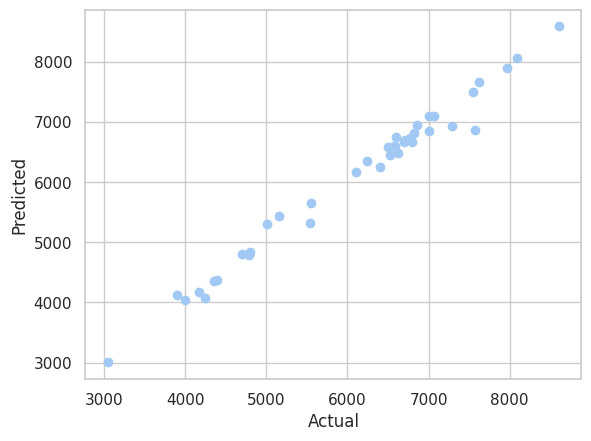

In [57]:
plt.scatter(y_test,y_test_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


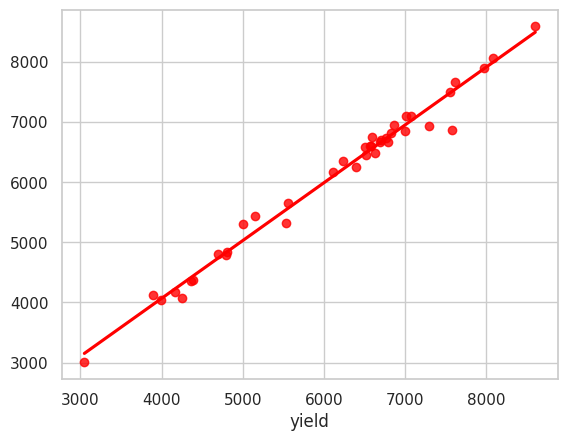

In [58]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red');


In [59]:
test_set_predict = model.predict(test_set)

## PRIVACY

Splitting the dataset for privacy preserving algorithms

In [60]:
import pandas as pd
train_set =pd.read_csv("/content/train_set.csv")
test_set= pd.read_csv("/content/test_set.csv")


In [61]:
import pandas as pd

# Assuming you have a DataFrame named 'original_df'
train_set =pd.read_csv("/content/train_set.csv")

# Calculate the number of entries in each sub-DataFrame
entries_per_df = len(train_set) // 7

# Create 7 separate DataFrames
dataframes = [train_set.iloc[i * entries_per_df:(i + 1) * entries_per_df] for i in range(7)]


### Private Aggregation of Teacher Ensembles - PATE

In [62]:
from catboost import CatBoostRegressor
models = []

for df in dataframes:
    print(df)
    X = df.drop(columns=['yield'])
    y = df['yield']

    # Create and train a CatBoost model
    model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_seed=42)
    model.fit(X, y)

    # Append the trained model to the list
    models.append(model)

     Unnamed: 0  Row#  clonesize  honeybee  bumbles  andrena  osmia  \
0            40    40       25.0      0.25     0.25     0.25   0.38   
1           493   493       25.0      0.50     0.25     0.38   0.75   
2           489   489       25.0      0.50     0.25     0.38   0.75   
3           593   593       25.0      0.50     0.25     0.63   0.75   
4           425   425       12.5      0.25     0.38     0.50   0.63   
..          ...   ...        ...       ...      ...      ...    ...   
100         412   412       12.5      0.25     0.38     0.50   0.50   
101          48    48       25.0      0.25     0.25     0.25   0.38   
102         715   715       25.0      0.50     0.38     0.50   0.63   
103         313   313       12.5      0.25     0.25     0.75   0.50   
104         474   474       25.0      0.50     0.25     0.38   0.63   

     MaxOfUpperTRange  RainingDays  fruitset        yield  
0                86.0         16.0  0.443420  4870.625368  
1                86.0      

In [63]:
import pandas as pd

# Assuming you have 'actual_values' as a DataFrame
actual_values = test_set['yield']

# Create a list of seven copies of the DataFrame
copies = [actual_values.copy() for _ in range(7)]

# Concatenate the copies into a single DataFrame
concatenated_actual_values = pd.concat(copies, axis=1, ignore_index=True)


In [64]:
import pandas as pd
from catboost import CatBoostRegressor

predictions_df = pd.DataFrame()

for i, model in enumerate(models):

    test_features = test_set.drop(columns=['yield'])  # Replace 'features' with your list of feature names

    predictions = model.predict(test_features)

    predictions_df[f'{i}'] = predictions


In [65]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Get the number of rows in the DataFrame
num_rows = len(predictions_df)
best_values=[]
# Iterate through the DataFrame using a range-based for loop
for row_index in range(num_rows):
    predicted = predictions_df.iloc[row_index].to_numpy()
    actual=concatenated_actual_values.iloc[row_index].to_numpy()
    difference=abs(predicted-actual)
    ind= np.argmax(difference == min(difference))
    #print(min(abs(predicted-actual)))
    #print(ind)
    best_values.append(predicted[3])
print(best_values)


[6788.895940853738, 4330.579953483693, 6556.5986543738445, 4446.785490657661, 4327.209789312954, 6585.557899410728, 5868.163406685974, 7340.57272441922, 7158.950115558025, 4877.963158993628, 3518.4135454953484, 6528.5503973276755, 6728.28352395306, 5154.0711385951045, 7118.811108859784, 6397.59326192451, 6512.846791091565, 7942.943779486445, 6973.918598553269, 3802.2128200861102, 6545.040810282109, 7865.120039496719, 6594.329731888053, 6380.513231420048, 4220.829689740403, 6325.842637908964, 5519.468011669672, 6236.140244325204, 4742.4150731235695, 6299.653436686551, 4949.894580491446, 8145.84384277887, 5464.00605473015, 6540.440210792331, 8458.558170222164, 5590.244021183295, 7071.711777309672, 6571.928292287836, 6708.13225139183]


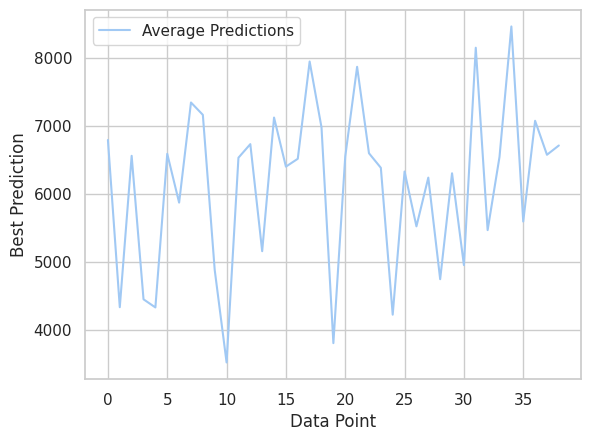

In [66]:
import matplotlib.pyplot as plt

# Assuming you have 'average_predictions' containing the average predictions

# Create an index for the x-axis (you can use row numbers or any other identifier)
index = range(len(best_values))

# Create a line plot of the average predictions
plt.plot(index, best_values, label='Average Predictions')

# Add labels and a legend
plt.xlabel('Data Point')
plt.ylabel('Best Prediction')
plt.legend()

# Show the plot
plt.show()


### Federated Learning

In [67]:
from catboost import CatBoostRegressor
models = []

for df in dataframes:
    print(df)
    X = df.drop(columns=['yield'])
    y = df['yield']

    # Create and train a CatBoost model
    model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_seed=42)
    model.fit(X, y)

    # Append the trained model to the list
    models.append(model)


     Unnamed: 0  Row#  clonesize  honeybee  bumbles  andrena  osmia  \
0            40    40       25.0      0.25     0.25     0.25   0.38   
1           493   493       25.0      0.50     0.25     0.38   0.75   
2           489   489       25.0      0.50     0.25     0.38   0.75   
3           593   593       25.0      0.50     0.25     0.63   0.75   
4           425   425       12.5      0.25     0.38     0.50   0.63   
..          ...   ...        ...       ...      ...      ...    ...   
100         412   412       12.5      0.25     0.38     0.50   0.50   
101          48    48       25.0      0.25     0.25     0.25   0.38   
102         715   715       25.0      0.50     0.38     0.50   0.63   
103         313   313       12.5      0.25     0.25     0.75   0.50   
104         474   474       25.0      0.50     0.25     0.38   0.63   

     MaxOfUpperTRange  RainingDays  fruitset        yield  
0                86.0         16.0  0.443420  4870.625368  
1                86.0      

In [68]:
import pandas as pd
from catboost import CatBoostRegressor

predictions_df = pd.DataFrame()

for i, model in enumerate(models):

    test_features = test_set.drop(columns=['yield'])  # Replace 'features' with your list of feature names

    predictions = model.predict(test_features)

    predictions_df[f'{i}'] = predictions

# Now, 'predictions_df' contains the predictions from all seven models for the test dataset.
# You can use these predictions for further analysis or evaluation.
predictions_df

,0,1,2,3,4,5,6
0,6860.306655,6749.994617,6760.413620,6788.895941,7025.413973,6770.820266,6775.531588
1,4280.524489,4437.780533,4430.028788,4330.579953,4459.982862,4573.356559,4730.795100
2,6613.077353,6755.982291,6760.514830,6556.598654,6796.783095,6884.650023,6744.100206
3,4016.860347,4024.179110,4185.746138,4446.785491,3923.304158,3978.450436,4400.893699
4,4242.878243,4406.375938,4356.792706,4327.209789,4410.842324,4323.251460,4338.943740
5,6701.795639,6521.528995,6752.880025,6585.557899,6939.104789,6715.112998,6553.015257
6,5663.757108,5583.028400,5494.576257,5868.163407,5547.193718,5729.294608,5657.993162
7,7547.243880,7553.881826,7437.329054,7340.572724,7366.408789,7615.911120,7542.612866
8,6215.960897,7008.007721,7188.899632,7158.950116,6290.477439,6467.895304,6805.676069
9,4868.717528,4826.629750,4916.611498,4877.963159,4580.700606,4788.016274,4871.143403


In [69]:
average_predictions = predictions_df.mean(axis=1)

In [70]:
average_predictions

0     6818.768094
1     4463.292612
2     6730.243779
3     4139.459911
4     4343.756314
5     6681.285086
6     5649.143809
7     7486.280037
8     6733.695311
9     4818.540317
10    3148.955140
11    6490.787895
12    6785.361579
13    4676.671997
14    7006.663867
15    6638.232855
16    6581.939596
17    7772.664828
18    6909.943761
19    3950.370205
20    6668.368331
21    7610.369008
22    6602.354920
23    6342.073184
24    4018.691536
25    6387.045709
26    5328.613539
27    6261.616797
28    4809.863992
29    6312.608577
30    4973.909361
31    7962.324260
32    5257.538608
33    6641.157493
34    8311.036411
35    5359.413000
36    6918.542187
37    6659.920674
38    6726.994329
dtype: float64

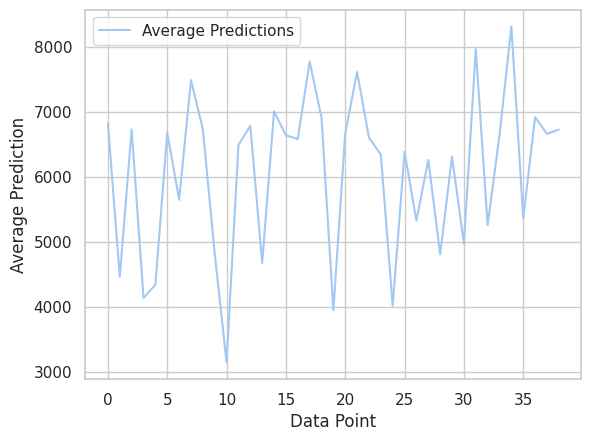

In [71]:
import matplotlib.pyplot as plt

# Assuming you have 'average_predictions' containing the average predictions

# Create an index for the x-axis (you can use row numbers or any other identifier)
index = range(len(average_predictions))

# Create a line plot of the average predictions
plt.plot(index, average_predictions, label='Average Predictions')

# Add labels and a legend
plt.xlabel('Data Point')
plt.ylabel('Average Prediction')
plt.legend()

# Show the plot
plt.show()
